<a href="https://colab.research.google.com/github/geetha2612/deep__learning/blob/main/face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir="/content/drive/MyDrive/Original Images"
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())

Found 673 images belonging to 8 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization , Activation

model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 111, 111, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                        

In [ ]:
history = model.fit(train_ds,epochs= 30, batch_size=32)

Epoch 1/30
22/22 [==============================] - 310s 14s/step - loss: 2.3724 - accuracy: 0.2155
Epoch 2/30
22/22 [==============================] - 94s 4s/step - loss: 1.5350 - accuracy: 0.4502
Epoch 3/30
22/22 [==============================] - 86s 4s/step - loss: 1.2343 - accuracy: 0.5394
Epoch 4/30
22/22 [==============================] - 85s 4s/step - loss: 0.9495 - accuracy: 0.6850
Epoch 5/30
22/22 [==============================] - 81s 4s/step - loss: 0.7781 - accuracy: 0.7400
Epoch 6/30
22/22 [==============================] - 86s 4s/step - loss: 0.8629 - accuracy: 0.7058
Epoch 7/30
22/22 [==============================] - 82s 4s/step - loss: 0.5617 - accuracy: 0.8158
Epoch 8/30
22/22 [==============================] - 93s 4s/step - loss: 0.5173 - accuracy: 0.8499
Epoch 9/30
22/22 [==============================] - 87s 4s/step - loss: 0.5691 - accuracy: 0.8172
Epoch 10/30
22/22 [==============================] - 82s 4s/step - loss: 0.5730 - accuracy: 0.8113
Epoch 11/30
22/22

In [ ]:
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

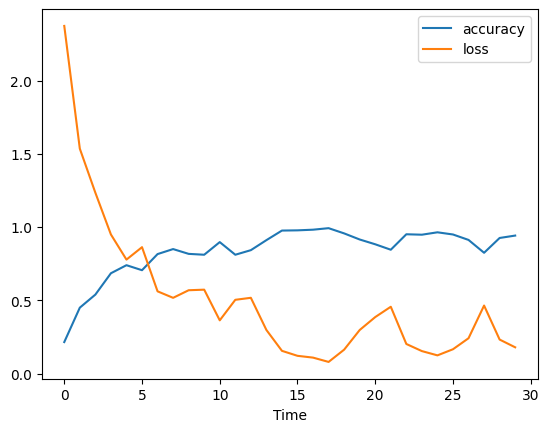

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()

In [ ]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted: "+classes[np.argmax(pred)])

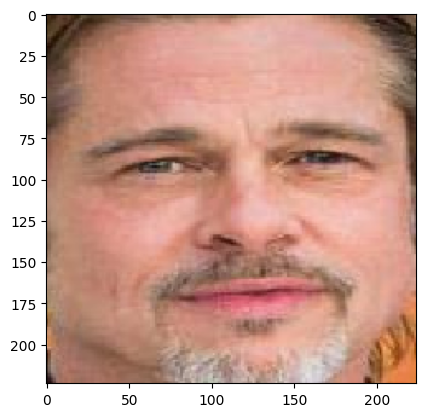

1/1 [==============================] - 0s 58ms/step
Actual: Brad Pitt
Predicted: Billie Eilish


In [ ]:
predict_image("/content/drive/MyDrive/Faces/Faces/Brad Pitt_18.jpg")

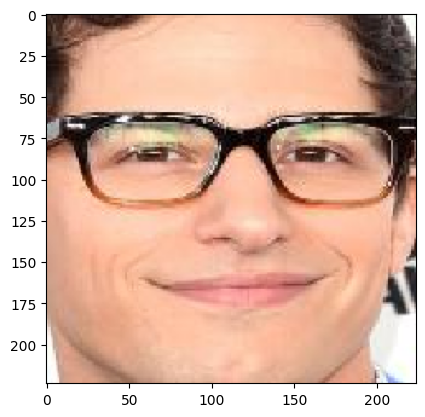

1/1 [==============================] - 0s 61ms/step
Actual: Andy Samberg
Predicted: Akshay Kumar


In [ ]:
predict_image("/content/drive/MyDrive/Faces/Faces/Andy Samberg_71.jpg")

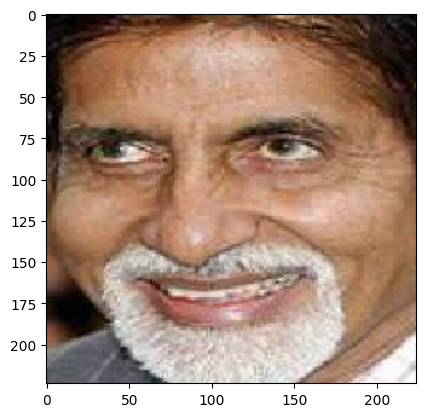

1/1 [==============================] - 0s 50ms/step
Actual: Amitabh Bachchan
Predicted: Billie Eilish


In [ ]:
predict_image("/content/drive/MyDrive/Faces/Faces/Amitabh Bachchan_49.jpg")